In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
#import seaborn as sns
#sns.set()

%matplotlib inline



In [7]:
# from google.colab import drive
# drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [8]:
# os.chdir('/content/drive/MyDrive/Data/')
# dataDir = '/content/drive/MyDrive/Data/'


## Data Cleaning

In [2]:
# Get the current directory

files = os.listdir()

current_directory = os.getcwd()

# # Define the path to the data folder
data_folder = os.path.join(current_directory, 'Data')

# # List all files in the data folder
files = os.listdir(data_folder)


# Read each CSV file in the data folder
for file in files:
    if file.endswith('listings2024_03.csv'):
        print("df2024_03")
        file_path1 = os.path.join(data_folder, file)
        df2024_03 = pd.read_csv(file_path1)
    elif file.endswith('listings2024_02.csv'):
        print("df2024_02")
        file_path2 = os.path.join(data_folder, file)
        df2024_02 = pd.read_csv(file_path2)
    elif file.endswith("listings2024_01.csv"):
        print("df2024_01")
        file_path3 = os.path.join(data_folder, file)
        df2024_01 = pd.read_csv(file_path3)
    elif file.endswith("listings2023_12.csv"):
        print("df2023_12")
        file_path4 = os.path.join(data_folder, file)
        df2023_12 = pd.read_csv(file_path4)
    elif file.endswith("listings2023_11.csv"):
        print("df2023_11")
        file_path5 = os.path.join(data_folder, file)
        df2023_11 = pd.read_csv(file_path5)
    elif file.endswith("listings2023_10.csv"):
        print("df2023_10")
        file_path6 = os.path.join(data_folder, file)
        df2023_10 = pd.read_csv(file_path6)
    elif file.endswith("listings2023_09.csv"):
        print("df2023_09")
        file_path7 = os.path.join(data_folder, file)
        df2023_09 = pd.read_csv(file_path7)
    elif file.endswith("listings2023_08.csv"):
        print("df2023_08")
        file_path8 = os.path.join(data_folder, file)
        df2023_08 = pd.read_csv(file_path8)
    elif file.endswith("listings2023_07.csv"):
        print("df2023_07")
        file_path9 = os.path.join(data_folder, file)
        df2023_07 = pd.read_csv(file_path9)
    elif file.endswith("listings2023_06.csv"):
        print("df2023_06")
        file_path10 = os.path.join(data_folder, file)
        df2023_06 = pd.read_csv(file_path10)
    elif file.endswith("listings2023_05.csv"):
        print("df2023_05")
        file_path11 = os.path.join(data_folder, file)
        df2023_05 = pd.read_csv(file_path11)
    elif file.endswith("listings2023_04.csv"):
        print("df2023_04")
        file_path12 = os.path.join(data_folder, file)
        df2023_04 = pd.read_csv(file_path12)




df2023_04
df2023_05
df2023_06
df2023_07
df2023_08
df2023_09
df2023_10
df2023_11
df2023_12
df2024_01
df2024_02
df2024_03


In [ ]:
# List of DataFrames
dataframes = [
    df2023_08, df2024_01, df2023_09, df2024_02, df2024_03,
    df2023_07, df2023_12, df2023_06, df2023_10, df2023_04,
    df2023_05, df2023_11
]

# Dictionary to hold the names and lengths
df_lengths = {}

# Iterate through the DataFrames and print their lengths
for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_lengths[month_year] = len(df)

# Print the lengths
for name, length in df_lengths.items():
    print(f"Length of {name}: {length}")

Length of df2023_04: 43582
Length of df2023_05: 39719
Length of df2023_06: 39453
Length of df2023_07: 39202
Length of df2023_08: 39319
Length of df2023_09: 43729
Length of df2023_10: 39627
Length of df2023_11: 43566
Length of df2023_12: 38792
Length of df2024_01: 43241
Length of df2024_02: 43303
Length of df2024_03: 39160


In [ ]:
df_missing_values = {}

for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_missing_values[month_year] = df.isnull().sum()

for name, missing_counts in df_missing_values.items():
    print(f"Missing values in {name}:")
    print(missing_counts)
    print()

Missing values in df2023_04:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10603
reviews_per_month                 10603
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43582
dtype: int64

Missing values in df2023_05:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbou

### Add Zipcode

In [ ]:
NYCzipcode = gpd.read_file('ZIPCODE/ZIP_CODE_040114.shp')

In [ ]:
df2024_01_gdf = gpd.GeoDataFrame(
    df2024_01,
    geometry=gpd.points_from_xy(df2024_01.longitude, df2024_01.latitude),
    crs="EPSG:4326"
)

In [ ]:
# 2024_1 with ziocode not all data.
df2024_01_gdf = df2024_01_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2024_01_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202401_with_zip = df2024_01.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [ ]:
#Removing the Duplicates if any
airbnb202401_with_zip.duplicated().sum()
airbnb202401_with_zip.drop_duplicates(inplace=True)
len(airbnb202401_with_zip)

39719

### Crime Data

In [ ]:
file_path_crimes = os.path.join(data_folder, 'NYPD_Hate_Crimes_20240305.csv')
crimes = pd.read_csv(file_path_crimes)
crimes.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


## Descriptive Analysis

In [ ]:
crimes.dtypes

Full Complaint ID                  int64
Complaint Year Number              int64
Month Number                       int64
Record Create Date                object
Complaint Precinct Code            int64
Patrol Borough Name               object
County                            object
Law Code Category Description     object
Offense Description               object
PD Code Description               object
Bias Motive Description           object
Offense Category                  object
Arrest Date                      float64
Arrest Id                         object
dtype: object

In [ ]:
crimes.County.unique()

array(['KINGS', 'NEW YORK', 'QUEENS', 'BRONX', 'RICHMOND'], dtype=object)

In [ ]:
airbnb202401_with_zip.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Kings= Brooklyn, RichMond= Staten Island
county_to_borough = {
    'KINGS': 'Brooklyn',
    'NEW YORK': 'Manhattan',
    'QUEENS': 'Queens',
    'BRONX': 'Bronx',
    'RICHMOND': 'Staten Island'
}

# Replace the county names with borough names in the 'County' column
crimes['County'] = crimes['County'].replace(county_to_borough)

In [ ]:
crimes.County.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
crimes.shape

(2406, 14)

### Rental Income

In [ ]:
rental = pd.read_csv("DOF_Condominium_Comparable_Rental_Income_in_NYC_20231211.csv")

In [ ]:
rental_gross_income = rental.groupby(['Neighborhood']).agg({'Gross Income per SqFt': 'mean'})
rental_gross_income.sort_index(inplace=True)
rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
15TH Q QUEENS,29.626667
2999,12.600000
30TH Q BROOKLYN,20.820000
50TH Q BROOKLYN,24.882500
5TH Q BROOKLYN,26.815000


In [ ]:
airbnb_neighbor_price = df2024_01.groupby(['neighbourhood']).agg({'price': 'mean'})
airbnb_neighbor_price.head()

,price
neighbourhood,
Allerton,117.904762
Arden Heights,115.000000
Arrochar,137.666667
Arverne,220.280000
Astoria,117.700000


In [ ]:
airbnb_neighbor_price.index = airbnb_neighbor_price.index.str.upper()
filtered_rental_gross_income = rental_gross_income[rental_gross_income.index.isin(airbnb_neighbor_price.index)]
filtered_rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
ARVERNE,29.905000
ASTORIA,27.833360
BATH BEACH,17.751803
BAY RIDGE,20.267846
BAYSIDE,23.749327


In [ ]:
Rental_marketvalue = rental.groupby(['Neighborhood']).agg({'Market Value per SqFt': 'mean'})
filtered_Rental_marketvalue = Rental_marketvalue[Rental_marketvalue.index.isin(airbnb_neighbor_price.index)]
filtered_Rental_marketvalue.head()

,Market Value per SqFt
Neighborhood,
ARVERNE,137.250000
ASTORIA,143.843281
BATH BEACH,73.815082
BAY RIDGE,90.857385
BAYSIDE,120.646635


## Exploratory Analysis

(目前只做了202401 后面需要可以直接copy代码改数)

In [ ]:
#drop unnecessary columns
df2024_01.drop(['name','id','host_name','last_review','number_of_reviews_ltm', 'license'], axis=1, inplace=True)
df2024_01.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#select the number columns
numeric_df = df2024_01.select_dtypes(include=[np.number])


Get Correlation between different variables

<Axes: >

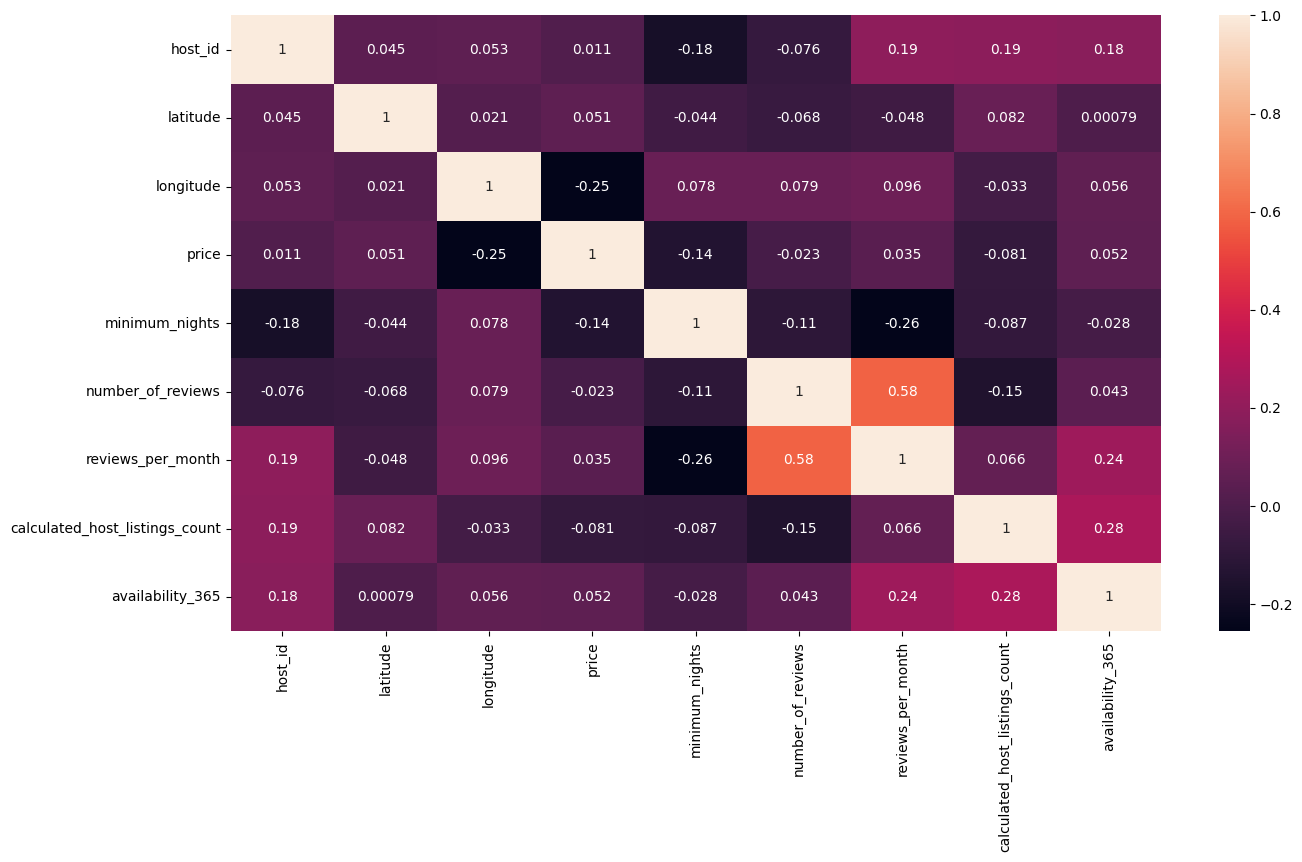

In [ ]:
corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

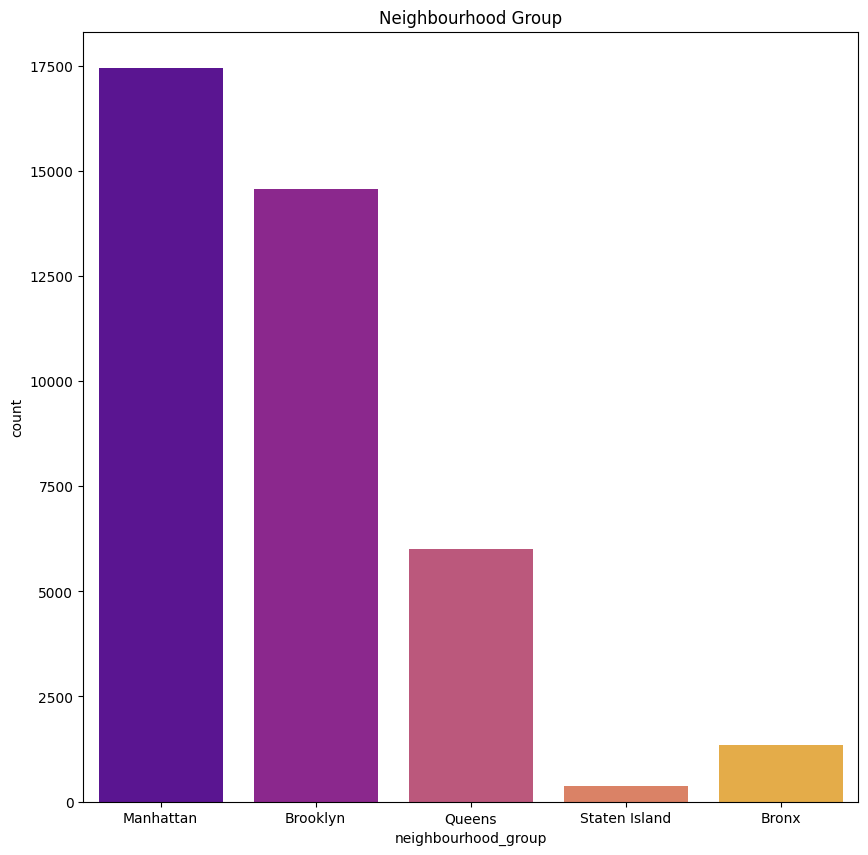

In [ ]:
sns.countplot(x='neighbourhood_group', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

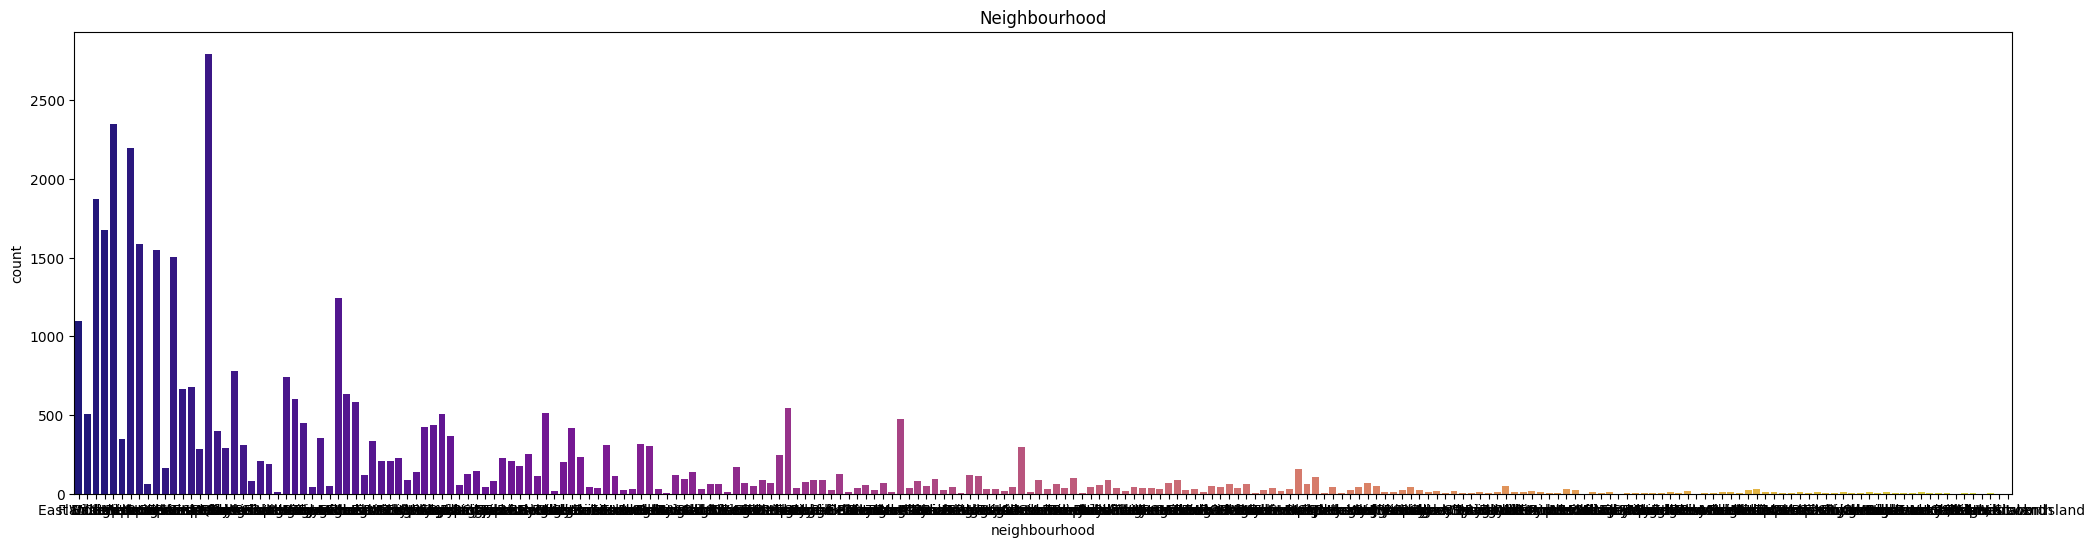

In [ ]:
sns.countplot(x='neighbourhood', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')


In [ ]:
df2024_01['neighbourhood'] = df2024_01['neighbourhood'].astype(str)

Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

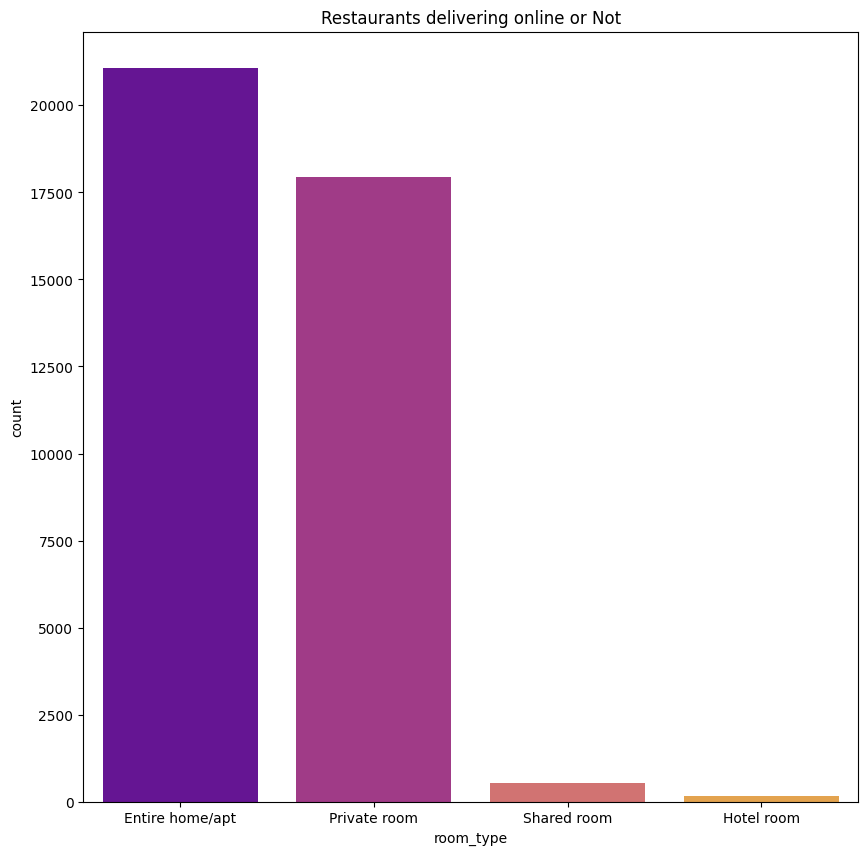

In [ ]:
#Restaurants delivering Online or not
sns.countplot(x='room_type', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Relation between neighbourgroup and Availability of Room¶


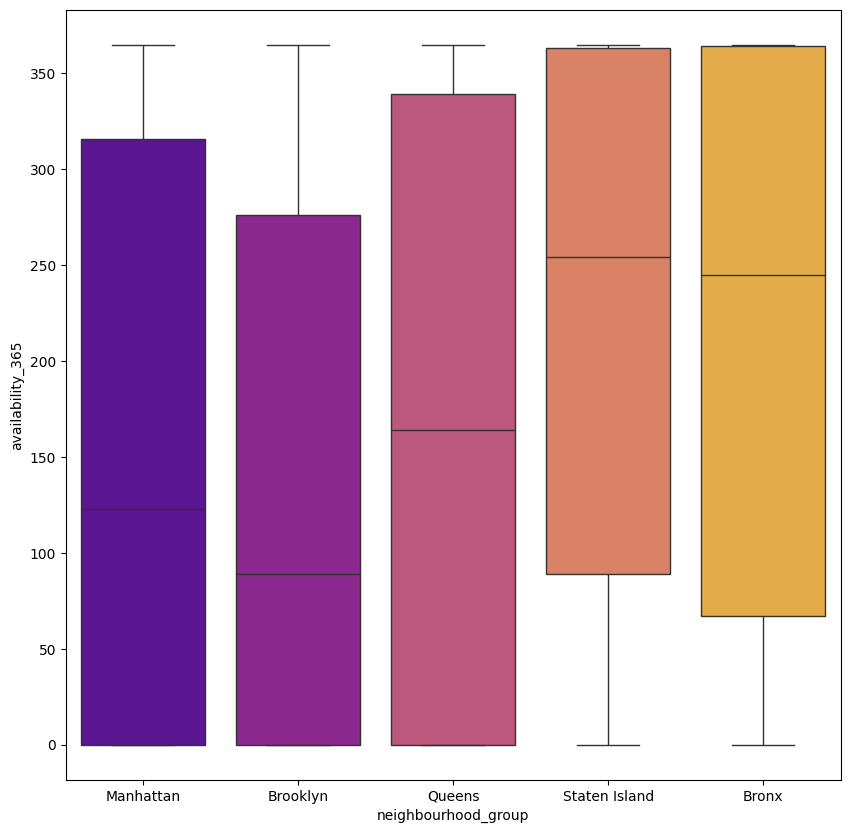

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df2024_01, x='neighbourhood_group',y='availability_365',palette='plasma')

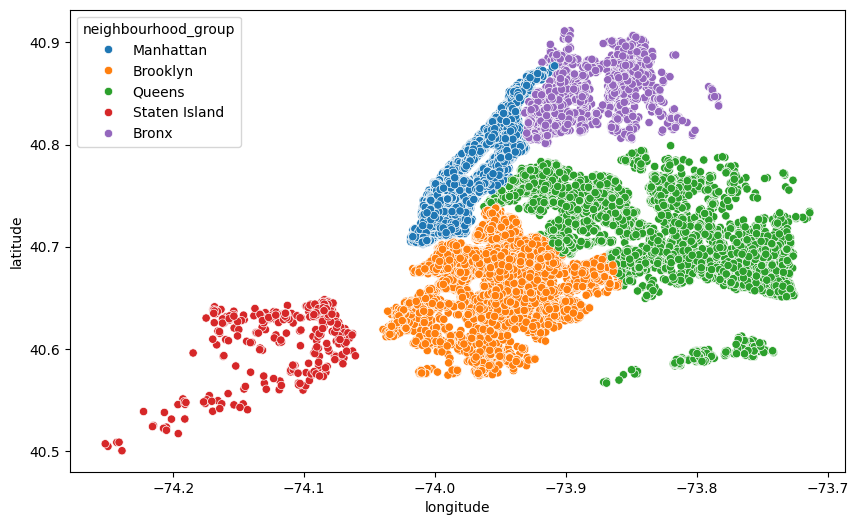

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['neighbourhood_group'])
plt.ioff()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['availability_365'])
plt.ioff()

In [ ]:
df2024_01
#发现availability_365数据有问题

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5448955,Manhattan,East Village,40.731790,-73.986790,Entire home/apt,NaN,30,15,0.20,1,0
1,83422715,Brooklyn,Flatbush,40.653750,-73.955020,Entire home/apt,289.0,30,0,NaN,1,365
2,43719554,Manhattan,Harlem,40.824400,-73.945980,Private room,NaN,30,0,NaN,1,0
3,5925222,Brooklyn,Bushwick,40.690200,-73.917820,Entire home/apt,NaN,30,1,0.01,1,0
4,268631641,Manhattan,East Village,40.723850,-73.976950,Private room,NaN,30,1,0.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39714,3237504,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,0.48,1,0
39715,304317395,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2.09,1,0
39716,51678353,Manhattan,West Village,40.733170,-74.006080,Private room,NaN,30,2,0.02,1,0
39717,163083101,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,7,0.91,1,363


### Time Series

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [ ]:
# Convert 'last_review' column to datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

# Set 'last_review' as index
df.set_index('last_review', inplace=True)


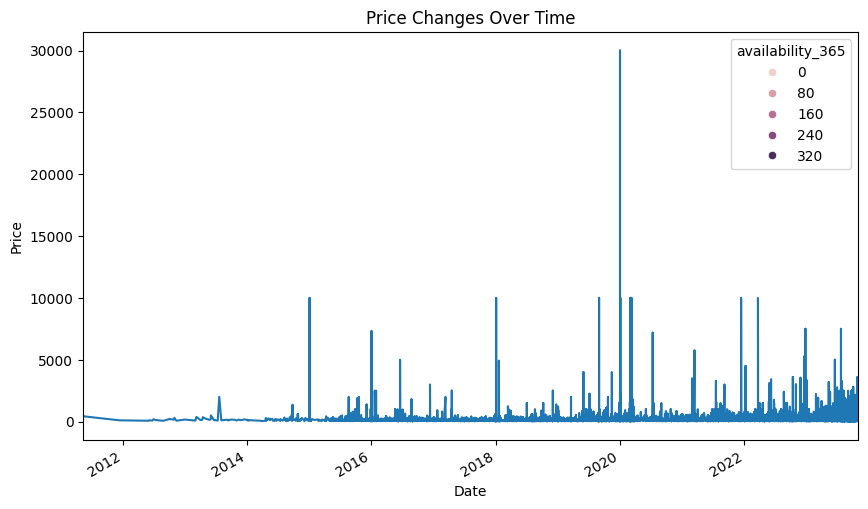

In [ ]:
# Plot price changes over time
df['price'].plot()
plt.title('Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set the range of the x-axis to the minimum and maximum dates of the dataset
plt.xlim(df.index.min(), df.index.max())

plt.show()



In [ ]:
# Confirm whether 'last_review' is a column of DataFrame
if 'last_review' in df.columns:
    # If 'last_review' is a column, remove NaT by column
    df.dropna(subset=['last_review'], inplace=True)
    # Convert 'last_review' column to DatetimeIndex
    df['last_review'] = pd.to_datetime(df['last_review'])
    df.set_index('last_review', inplace=True)
else:
    # If 'last_review' is already an index
    df.index = pd.to_datetime(df.index)  # Make sure the index is of DatetimeIndex type
    df = df[~df.index.isna()]  # Delete rows with index NaT

# Aggregate duplicate date data
if df.index.duplicated().any():
    df = df.groupby(df.index).agg({'price': 'mean'})  # Aggregate using average of prices

# Try setting it to daily frequency
df = df.asfreq('D', method='pad')  # Use forward padding to handle missing dates

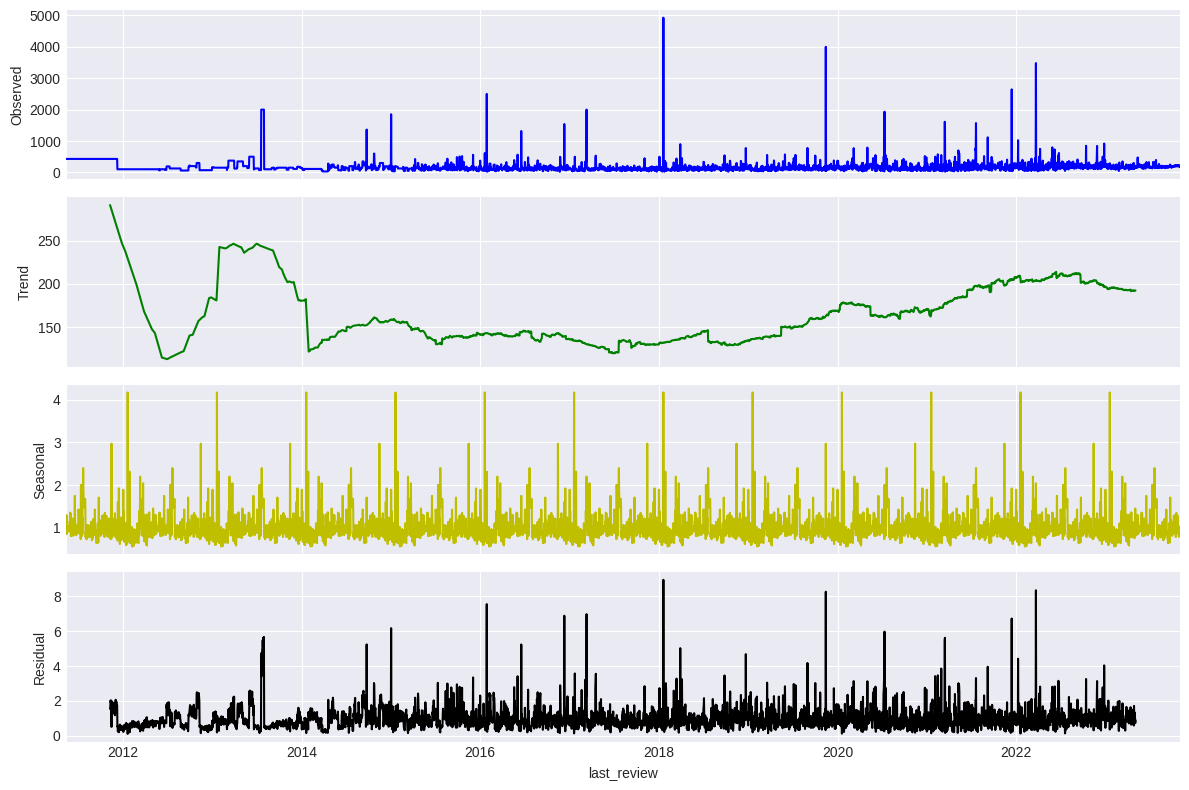

In [ ]:
# Try a multiplicative model for seasonal decomposition
result = seasonal_decompose(df['price'], model='multiplicative', period=365)

# Draw an exploded diagram using the method
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

result.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color = 'y')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()


### PCA...

#### data prepare

In [3]:
# Get the current directory
current_directory = os.getcwd()

# Define the path to the data folder
data_folder = os.path.join(current_directory, 'Data')

# List all files in the data folder
files = os.listdir(data_folder)

# Read each CSV file in the data folder
for file in files:
    if file.startswith('listings20') and '_' in file:
        var_name = 'df'+file.split('.')[0][-7:]
        file_path = os.path.join(data_folder, file)
        df = pd.read_csv(file_path)
        locals()[var_name] = pd.read_csv(file_path)

In [4]:
rf_data = df2024_01

In [5]:
df = rf_data['name'].str.split('·')

new_columns = ['property_type','star','bedroom','bed','bath']
for col in new_columns:
    rf_data[col] = None

i=0
for row in df:
    strr = rf_data['name'][i]
    n=len(row)
    cols=[]
    j=0
    if n>len(cols) and 'in' in strr:
        row[j]=row[j].split('in')[0].strip()
        cols.append(new_columns[0])
        j+=1
    if n>len(cols) and '★' in strr:
        if row[j].split('★')[-1].strip()!='New':
            row[j]=float(row[j].split('★')[-1].strip())
        else:
            row[j]=None
        cols.append(new_columns[1])
        j+=1
    if n>len(cols) and ('bedroom' in strr or 'Studio' in strr):
        if row[j].strip().split()[0]=='Studio' or row[j].strip().split()[0]=='bedroom':
            row[j]=0
        else:
            row[j]= int(row[j].strip().split()[0])
        j+=1
        cols.append(new_columns[2])
    if n>len(cols) and 'bed' in row[j]:
        row[j]=int(row[j].strip().split()[0])
        j+=1
        cols.append(new_columns[3])
    if n>len(cols) and 'bath' in strr:
        if row[j].strip()=='Shared half-bath' or 'Half-bath':
            row[j]=0.5
        else:
            row[j]=float(row[j].strip().split()[0])
        j+=1
        cols.append(new_columns[4])
    rf_data.loc[i, cols] = row
    i+=1

In [6]:
# last_review -date
rf_data['last_review'] = pd.to_datetime(rf_data['last_review'], errors='coerce')
# add dp_last_review : days past last review
rf_data['dp_last_review'] = (pd.Timestamp('2024-01-01') - rf_data['last_review']).dt.days

In [7]:
rf_data=rf_data[['id', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'dp_last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'bedroom', 'bed', 'bath']].set_index('id')
rf_data.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,dp_last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,bedroom,bed,bath
id,,,,,,,,,,,,,
21935608,East Village,Entire home/apt,NaN,30,15,1590.0,0.20,1,0,0,1,1,0.5
743430766348459803,Flatbush,Entire home/apt,289.0,30,0,NaN,NaN,1,365,0,1,1,0.5
22122723,Harlem,Private room,NaN,30,0,NaN,NaN,1,0,0,1,1,0.5
22434861,Bushwick,Entire home/apt,NaN,30,1,2191.0,0.01,1,0,0,3,4,0.5
35713272,East Village,Private room,NaN,30,1,1656.0,0.02,1,0,0,1,1,0.5


In [8]:
rf_data.dropna(inplace=True)

In [9]:
rf_data['dp_last_review'] = rf_data['dp_last_review'].astype('int32')
rf_data['bedroom'] = rf_data['bedroom'].astype('int32')
rf_data['bed'] = rf_data['bed'].astype('int32')
rf_data['bath'] = rf_data['bath'].astype('float32')

In [10]:
# int64 to int32，float64 to float32
rf_data = rf_data.select_dtypes(include=['int64']).astype('int32').join(
    rf_data.select_dtypes(exclude=['int64']),
    how='outer'
)
rf_data = rf_data.select_dtypes(include=['float64']).astype('float32').join(
    rf_data.select_dtypes(exclude=['float64']),
    how='outer'
)

In [11]:
# label encode
label_encoder = LabelEncoder()

columns_to_encode = ['room_type', 'neighbourhood']

for col in columns_to_encode:
    rf_data[col + '_LabelEncoded'] = label_encoder.fit_transform(rf_data[col])

columns_to_drop = ['room_type', 'neighbourhood']
rf_data = rf_data.drop(columns=columns_to_drop)

In [12]:
rf_data.dtypes

price                             float32
reviews_per_month                 float32
minimum_nights                      int32
number_of_reviews                   int32
calculated_host_listings_count      int32
availability_365                    int32
number_of_reviews_ltm               int32
dp_last_review                      int32
bedroom                             int32
bed                                 int32
bath                              float32
room_type_LabelEncoded              int32
neighbourhood_LabelEncoded          int32
dtype: object

In [13]:
rf_data.describe()

,price,reviews_per_month,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,dp_last_review,bedroom,bed,bath,room_type_LabelEncoded,neighbourhood_LabelEncoded
count,20269.000000,20269.000000,20269.000000,20269.000000,20269.000000,20269.000000,20269.000000,20269.000000,20269.000000,20269.000000,20269.0,20269.000000,20269.000000
mean,188.549118,1.263432,28.501949,42.982338,19.049040,205.922690,10.894913,309.273620,1.312004,1.735606,0.5,0.892496,104.468647
std,1034.433105,1.910222,33.274346,73.860748,71.513259,134.982989,21.376501,525.916474,0.879533,1.220631,0.0,1.012278,66.066280
min,10.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,-4.000000,0.000000,1.000000,0.5,0.000000,0.000000
25%,80.000000,0.220000,30.000000,4.000000,1.000000,87.000000,1.000000,37.000000,1.000000,1.000000,0.5,0.000000,52.000000
50%,125.000000,0.660000,30.000000,15.000000,2.000000,214.000000,3.000000,103.000000,1.000000,1.000000,0.5,0.000000,95.000000
75%,200.000000,1.810000,30.000000,50.000000,5.000000,353.000000,15.000000,263.000000,2.000000,2.000000,0.5,2.000000,162.000000
max,100000.000000,75.489998,1250.000000,1865.000000,713.000000,365.000000,1075.000000,4405.000000,15.000000,42.000000,0.5,3.000000,220.000000


In [14]:
# drop outliers
isolation_forest = IsolationForest(random_state = 88)

X_rf_data_copy = rf_data.copy()

# Predict the outliers, where -1 indicates an anomaly
A = isolation_forest.fit_predict(X_rf_data_copy)

# Retrieve the indices of the rows where anomalies are located
outlier_indices = np.where(A == -1)[0]
# Drop the outliers from the dataframe
X_rf_data_copy = rf_data.drop(rf_data.index[outlier_indices])

In [15]:
X_rf_data_copy.describe()

,price,reviews_per_month,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,dp_last_review,bedroom,bed,bath,room_type_LabelEncoded,neighbourhood_LabelEncoded
count,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.000000,18507.0,18507.000000,18507.000000
mean,168.581787,1.064463,27.152159,34.540390,16.078295,207.706543,8.696763,298.660831,1.246069,1.615011,0.5,0.899876,104.520236
std,1051.918213,1.136178,11.612296,50.386087,54.607157,134.045020,11.733676,496.642135,0.742752,0.944532,0.0,1.010201,65.949320
min,10.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,-4.000000,0.000000,1.000000,0.5,0.000000,0.000000
25%,80.000000,0.210000,30.000000,4.000000,1.000000,88.000000,1.000000,43.000000,1.000000,1.000000,0.5,0.000000,52.000000
50%,123.000000,0.600000,30.000000,13.000000,2.000000,218.000000,3.000000,107.000000,1.000000,1.000000,0.5,0.000000,95.000000
75%,190.000000,1.610000,30.000000,43.000000,5.000000,354.000000,13.000000,259.000000,1.000000,2.000000,0.5,2.000000,160.500000
max,100000.000000,8.940000,365.000000,469.000000,713.000000,365.000000,94.000000,4231.000000,9.000000,10.000000,0.5,3.000000,220.000000


In [16]:
print(X_rf_data_copy.shape)

(18507, 13)


In [17]:
X_rf_data_copy.columns

Index(['price', 'reviews_per_month', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'dp_last_review', 'bedroom', 'bed', 'bath',
       'room_type_LabelEncoded', 'neighbourhood_LabelEncoded'],
      dtype='object')

In [18]:
# standardization
scaler_X = preprocessing.StandardScaler().fit(X_rf_data_copy)
X_df2024_01_S=scaler_X.transform(X_rf_data_copy)

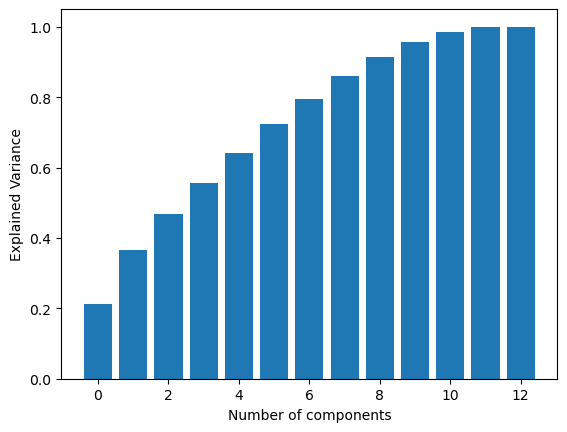

In [19]:
#plot explained variance over the number of compinents
# try to find a best component num
pca = PCA(X_df2024_01_S.shape[1])
X_S=pca.fit_transform(X_df2024_01_S)
eigenvalues = pca.explained_variance_ratio_
n= 13
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [27]:
bestPCA = PCA(9)
rf_data_PCA=bestPCA.fit_transform(X_df2024_01_S)
rf_data_PCA.shape

(18507, 9)

### Random Forest + PCA

In [28]:
X = rf_data_PCA
y = X_rf_data_copy['price']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=88)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=88)

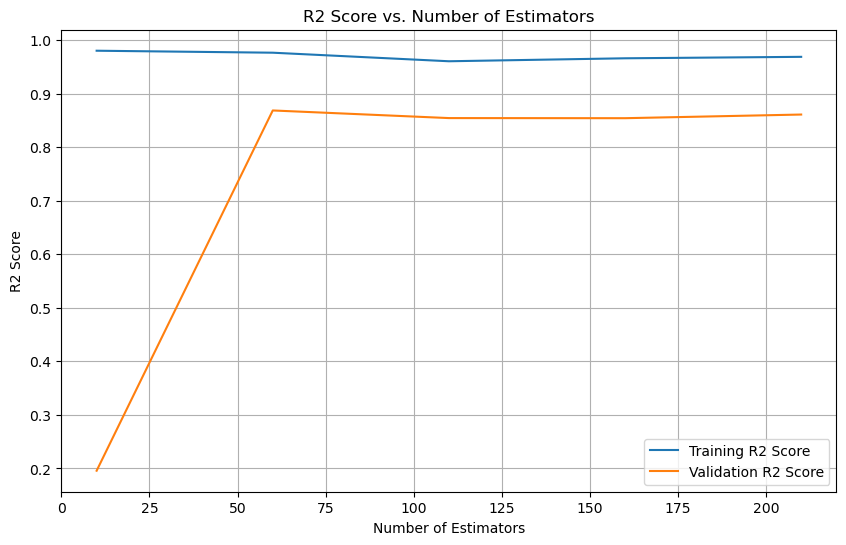

In [29]:
estimators = range(10,211,50)
train_scores = []
valid_scores = []
for n in estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    train_scores.append(r2_score(y_train, train_pred))
    valid_scores.append(r2_score(y_valid, valid_pred))
    # mse
#     train_scores.append(mean_squared_error(y_train, train_pred))
#     valid_scores.append(mean_squared_error(y_valid, valid_pred))
#     train_scores.append(mean_absolute_error(y_train, train_pred))
#     valid_scores.append(mean_absolute_error(y_valid, valid_pred))

# 绘制线图
plt.figure(figsize=(10, 6))
plt.plot(estimators, train_scores, label='Training R2 Score')
plt.plot(estimators, valid_scores, label='Validation R2 Score')
plt.xlabel('Number of Estimators')
# plt.ylabel('MSE Score')
# plt.title('MSE Score vs. Number of Estimators')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
param_grid = {
    'n_estimators': range(50, 76, 10)
}

# create model
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': range(50, 76, 10)}, scoring='r2',
             verbose=2)

In [38]:
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
y_test_pred = best_rf.predict(X_test)
test_score = r2_score(y_test, y_test_pred)

print(f"Best Paremeter: {grid_search.best_params_}")
print(f"train vs test R2 score: {train_score} vs {test_score}")

Best Paremeter: {'n_estimators': 60}
train vs test R2 score: 0.9761681205725833 vs 0.8581215519935909
